In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

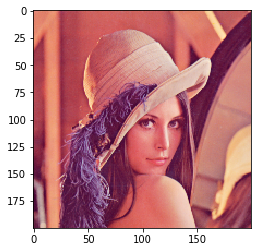

In [2]:
imgs = cv2.imread('images/Lenna_.png')
img = cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB)
img= cv2.resize(img,(200,200))
plt.imshow(img)

## Cropping

Text(0.5, 1.0, 'Face Cropped Image')

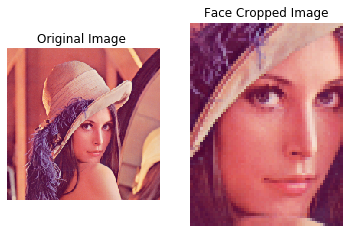

In [3]:
# Cropped image 
x, y= 75,75
h,w= 60,80
crop = img[x:x+w,y:y+h]
# copy= cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)
# cv2.imwrite('./images/lena_crop.png',copy)
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img)
ax1.axis('off')
ax1.set_title('Original Image ')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(crop)
ax2.axis('off')
ax2.set_title('Face Cropped Image')

Text(0.5, 1.0, 'Vertical Flip')

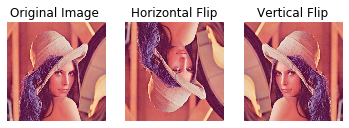

In [4]:
# Flip image
flip0= cv2.flip(img,0)
flip1= cv2.flip(img,1)
fig = plt.figure()
# se = cv2.flip(imgs,0)
# cv2.imwrite('./images/horiz_flip.png',se)
# swe = cv2.flip(imgs,1)
# cv2.imwrite('./images/vert_flip.png',swe)

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img)
ax1.axis('off')
ax1.set_title('Original Image ')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(flip0)
ax2.axis('off')
ax2.set_title('Horizontal Flip')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(flip1)
ax3.axis('off')
ax3.set_title('Vertical Flip')



(128, 128, 3)
(200, 200, 3)
(256, 256, 3)


Text(0.5, 1.0, 'Enlarged (256,256)')

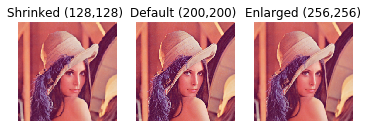

In [7]:
# Resize
imk= img
# imk= cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
smal= cv2.resize(imk,(128,128))
larg = cv2.resize(imk,(256,256))

# cv2.imwrite('./images/small.png',smal)
# cv2.imwrite('./images/large.png',larg)
# cv2.imwrite('./images/default.png',imk)
print(smal.shape)
print(imk.shape)
print(larg.shape)

fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(smal)
ax1.axis('off')
ax1.set_title('Shrinked (128,128) ')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(imk)
ax2.axis('off')
ax2.set_title('Default (200,200) ')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(larg)
ax3.axis('off')
ax3.set_title('Enlarged (256,256)')


In [6]:
# Advance Editing


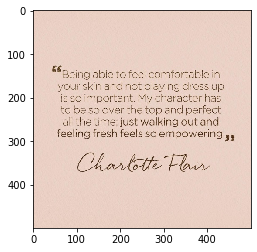

In [10]:
# Grayscaling and Thresholding
image= cv2.imread('images/text.png')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Text(0.5, 1.0, 'Thresholded Image')

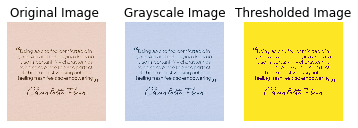

In [23]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
# cv2.imwrite('threshold.png',thresh)
fig = plt.figure()

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img)
ax1.axis('off')
ax1.set_title('Original Image ')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(image)
ax2.axis('off')
ax2.set_title('Grayscale Image')

ax2 = fig.add_subplot(1,3,3)
ax2.imshow(thresh)
ax2.axis('off')
ax2.set_title('Thresholded Image')

Text(0.5, 1.0, 'Otsu Threshold')

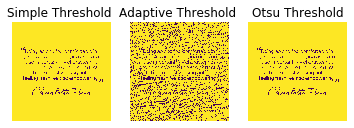

In [27]:
#Types of Thresholding
thresh=thresh

thresh_adapive = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
_,thresh_otsu = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# cv2.imwrite('images/adapt_threshold.png',thresh_adapive)
# cv2.imwrite('images/otsu_thresh.png',thresh_otsu)
fig = plt.figure()

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(thresh)
ax1.axis('off')
ax1.set_title('Simple Threshold ')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(thresh_adapive)
ax2.axis('off')
ax2.set_title('Adaptive Threshold ')

ax2 = fig.add_subplot(1,3,3)
ax2.imshow(thresh_otsu)
ax2.axis('off')
ax2.set_title('Otsu Threshold')


(-0.5, 249.5, 199.5, -0.5)

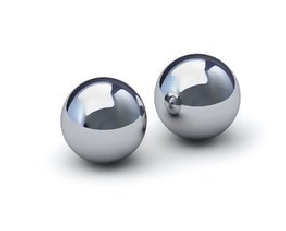

In [51]:
#Blur 
face = cv2.imread('images/face.png')
fk= cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(fk)
plt.axis('off')

### Averaging Blur

(-0.5, 249.5, 199.5, -0.5)

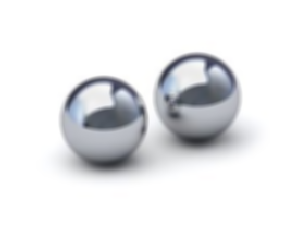

In [52]:
blur = cv2.blur(fk,(5,5))
cv2.imwrite('images/blur.png',cv2.cvtColor(blur, cv2.COLOR_RGB2BGR))
plt.imshow(blur)
plt.axis('off')


### Gaussian Blur

(-0.5, 249.5, 199.5, -0.5)

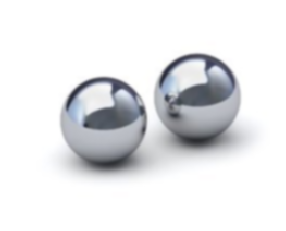

In [53]:
blur2=cv2.GaussianBlur(fk,(5,5),0)
cv2.imwrite('images/blur_gauss.png',cv2.cvtColor(blur2, cv2.COLOR_RGB2BGR))
plt.imshow(blur2)
plt.axis('off')


### Median Blur

(-0.5, 249.5, 199.5, -0.5)

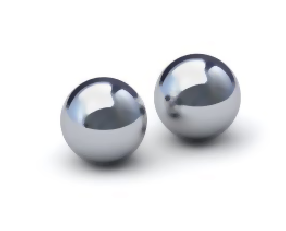

In [54]:
blur3= cv2.medianBlur(fk,5)
cv2.imwrite('images/blur_median.png',cv2.cvtColor(blur3, cv2.COLOR_RGB2BGR))
plt.imshow(blur3)
plt.axis('off')

### Bilateral Filtering

(-0.5, 249.5, 199.5, -0.5)

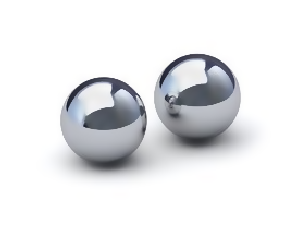

In [55]:
blur4= cv2.bilateralFilter(fk,9,75,75)
cv2.imwrite('images/blur_bilateral.png',cv2.cvtColor(blur4, cv2.COLOR_RGB2BGR))
plt.imshow(blur4)
plt.axis('off')

## Smoothening

(-0.5, 859.5, 852.5, -0.5)

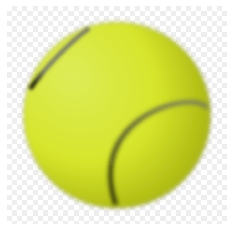

In [74]:
imk = cv2.imread('images/blurred.png')
plt.imshow(cv2.cvtColor(imk, cv2.COLOR_BGR2RGB))
plt.axis('off')



(-0.5, 859.5, 852.5, -0.5)

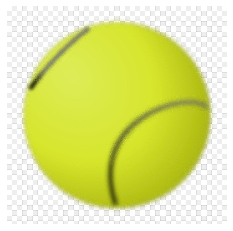

In [73]:
kernel = np.array(([0, -1, 0],[-1, 5, -1],[0, -1, 0]), 
dtype="int")
imk= cv2.filter2D(imk, -1, kernel)
cv2.imwrite('images/sharpen.png',imk)
image= cv2.cvtColor(imk, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
